# From Zero to Hero: Neural Networks

## Activation Functions

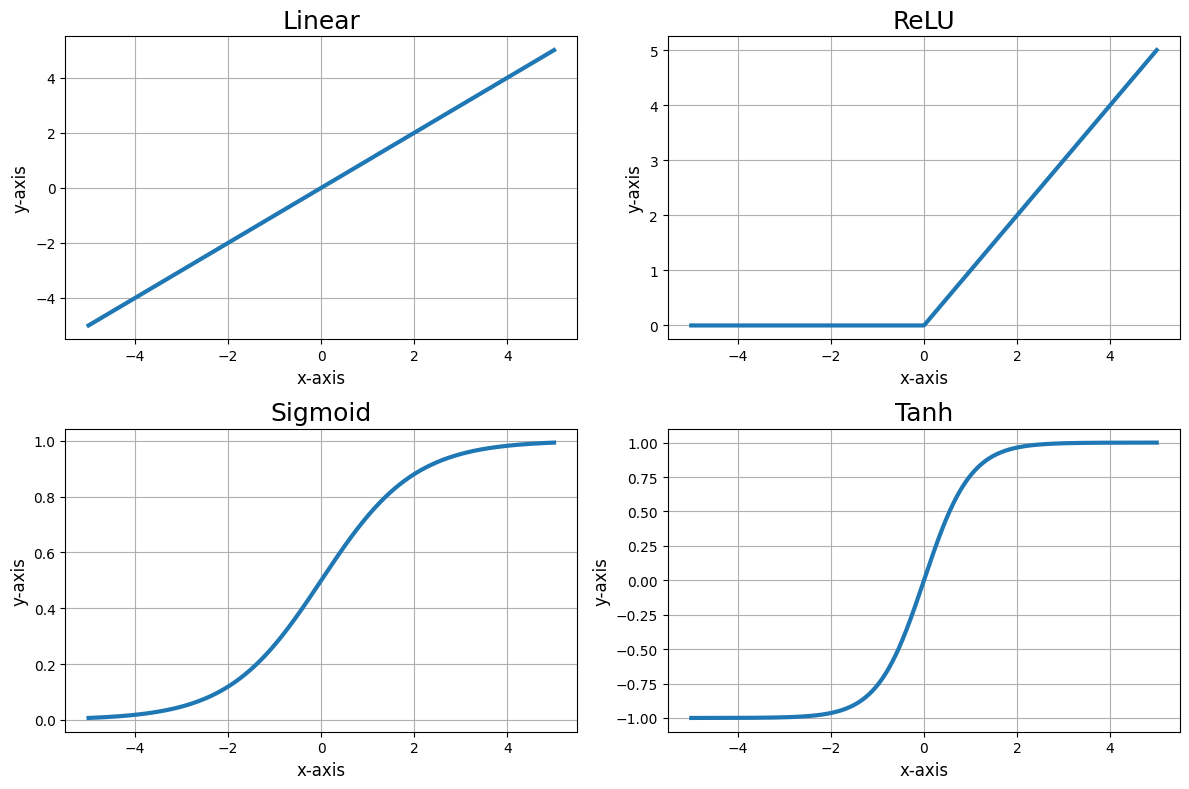

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def linear(x):
    return x

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 1000)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(x, linear(x), linewidth=3)
axes[0, 0].set_title('Linear', fontsize=18)
axes[0, 0].grid()

axes[0, 1].plot(x, relu(x), linewidth=3)
axes[0, 1].set_title('ReLU', fontsize=18)
axes[0, 1].grid()

axes[1, 0].plot(x, sigmoid(x), linewidth=3)
axes[1, 0].set_title('Sigmoid', fontsize=18)
axes[1, 0].grid()

axes[1, 1].plot(x, tanh(x), linewidth=3)
axes[1, 1].set_title('Tanh', fontsize=18)
axes[1, 1].grid()

for ax in axes.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

fig.tight_layout()
plt.show()


## MSE Loss Function

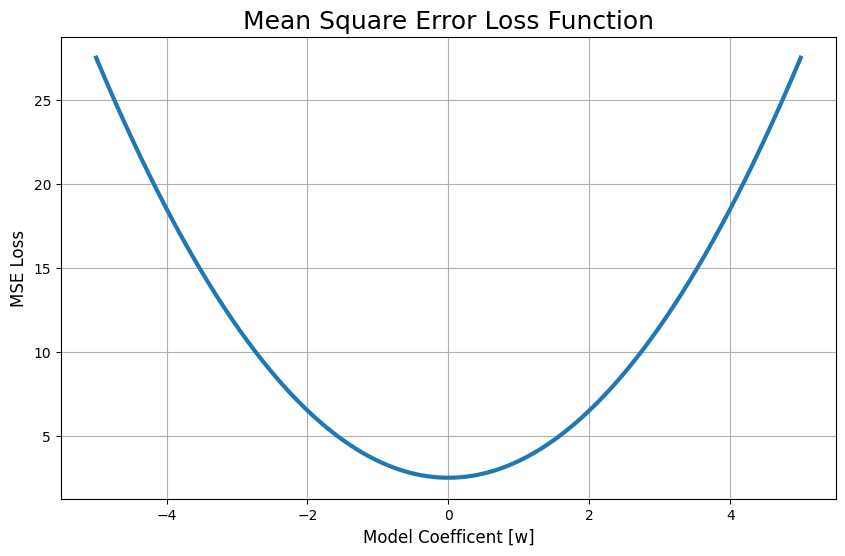

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2) + 2.5

y_true = 0  # Assume the true value is 0 for simplicity
x = np.linspace(-5, 5, 1000)
mse = [mse_loss(y_true, y_pred) for y_pred in x]

plt.figure(figsize=(10, 6))
plt.plot(x, mse, linewidth=3)
plt.title('Mean Square Error Loss Function', fontsize=18)
plt.xlabel('Model Coefficent [w]', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.grid()
plt.show()


# Forward Pass (Scaler version)

In [13]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def forward_pass(input_data, weights1, bias1, weights2, bias2):
    hidden_layer_output = relu(np.dot(input_data, weights1) + bias1)
    final_output = relu(np.dot(hidden_layer_output, weights2) + bias2)
    return final_output

# Randomly generate input data (shape: 3)
input_data = np.random.rand(3)

# Randomly generate weights and biases for the hidden layer (shape: 3x2)
weights1 = np.random.rand(3, 2)
bias1 = np.random.rand(2)

# Randomly generate weights and biases for the output layer (shape: 2x1)
weights2 = np.random.rand(2, 1)
bias2 = np.random.rand(1)

# Perform the forward pass
output = forward_pass(input_data, weights1, bias1, weights2, bias2)
print("Output:", output)


Output: [2.06017972]


# Forward Pass (Vectorized Version)

In [14]:
import numpy as np

def relu(x):
    return max(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Randomly generate input data (shape: 3)
input_data = np.random.rand(3)

# Randomly generate weights for the hidden layer
w1, w2, w3 = np.random.rand(3)

# Randomly generate biases for the hidden layer
b1 = np.random.rand()

# Randomly generate weights for the output layer
w4 = np.random.rand()

# Randomly generate biases for the output layer
b2 = np.random.rand()

# Calculate the weighted sum for the hidden layer neuron (step 1)
weighted_sum_hidden = input_data[0] * w1 + input_data[1] * w2 + input_data[2] * w3 + b1

# Apply the ReLU activation function to the hidden layer neuron (step 2)
hidden_output = relu(weighted_sum_hidden)

# Calculate the weighted sum for the output layer neuron (step 3)
weighted_sum_output = hidden_output * w4 + b2

# Apply the sigmoid activation function to the output layer neuron (step 4)
output = sigmoid(weighted_sum_output)

print("Output:", output)


Output: 0.8749715082395144


# Simple ANN using Tensorflow / Keras

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(1,) ) )
model.add(Dense(3, activation='relu') )
model.add(Dense(1) )

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 3)                 6         
                                                                 
 dense_40 (Dense)            (None, 3)                 12        
                                                                 
 dense_41 (Dense)            (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


# Regression Project using ANN

The Boston Housing dataset contains information about the housing market in Boston, including various features such as crime rate, average number of rooms per dwelling, and accessibility to highways. The target variable is the median value of owner-occupied homes in $1000s.

**The project objective is to predict the median value of a house in Boston, given the features of the area.**

1. Loading the dataset and understanding its structure. 
2. Splitting the dataset into training and testing sets.
3. Scaling the features using StandardScaler.
4. Building the ANN model using Keras with an input layer, a hidden layer, and an output layer.
5. Compiling the model with the Adam optimizer and mean squared error loss function.
6. Training the model with the training data.
7. Evaluating the model's performance on the test set.
8. Optionally, plotting the training and validation loss over epochs to visualize the model's training progress.


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [74]:
# Load the dataset
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target

In [75]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [77]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.2, random_state=42)

In [78]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [79]:
X_train[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [80]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
X_train[:5]

array([[ 1.28770177, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
        -1.42806858,  1.02801516, -0.80217296,  1.70689143,  1.57843444,
         0.84534281, -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, -0.27808871, -0.15723342,
        -0.68008655, -0.43119908,  0.32434893, -0.62435988, -0.58464788,
         1.20474139,  0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, -0.27808871, -1.00872286,
        -0.40206304, -1.6185989 ,  1.3306972 , -0.97404758, -0.60272378,
        -0.63717631,  0.06529747, -0.65159505],
       [ 0.38822983, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
        -0.30045039,  0.59168149, -0.8392398 ,  1.70689143,  1.57843444,
         0.84534281, -3.86819251,  1.52538664],
       [-0.32528234, -0.50032012, -0.41315956, -0.27808871, -0.15723342,
        -0.83109424,  0.03374663, -0.00549428, -0.62435988, -0.58464788,
         1.20474139,  0.3791194 , -0.16578736]])

In [127]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

In [128]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                896       
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


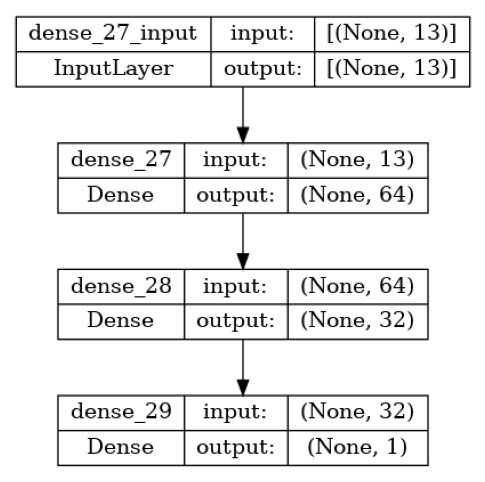

In [129]:
# Plot the ANN model
plot_model(model, to_file='model_reg.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8, 6))
img = plt.imread('model_reg.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [130]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and save its history
h = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
4/4 [==============================] - 0s 37ms/step - loss: 1.3068 - val_loss: 0.8313
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9228 - val_loss: 0.5438
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6358 - val_loss: 0.3335
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4050 - val_loss: 0.2021
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2575 - val_loss: 0.1427
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1530 - val_loss: 0.1401
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1113 - val_loss: 0.1757
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1019 - val_loss: 0.2118
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1034 - val_loss: 0.2223
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0997 - val_loss: 0.2076
Epoch 11/100
4/4 [=========

In [85]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Print the test loss
print("Test Loss:", test_loss)

4/4 [==============================] - 0s 3ms/step - loss: 11.2195
Test Loss: 11.219542503356934


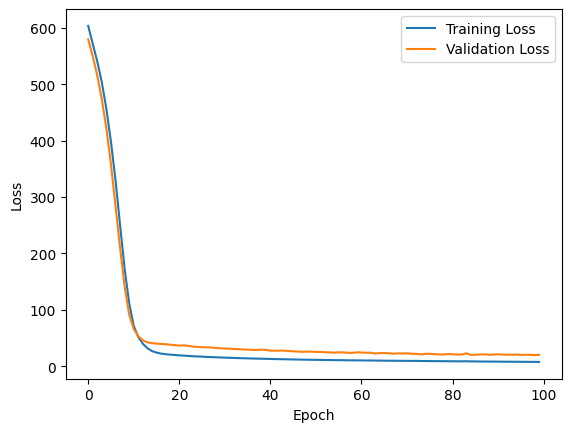

In [86]:
# Plot the model's training history
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [121]:
!pip install pydot graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 9.1 MB/s eta 0:00:00


# Classification Project using ANNs

The Wine dataset contains information about the chemical composition of wines from three different cultivars in Italy. The dataset has 13 features, including alcohol content, malic acid, and color intensity. The target variable is the class label of the wine, which is an integer (1, 2, or 3).

**The project objective is to classify the wine into one of the three classes based on its chemical composition.**

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical, plot_model

In [88]:
# Load the dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['class'] = wine.target

In [89]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [91]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((142, 13), (36, 13))

In [92]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
y_train[:10]

158    2
137    2
98     1
159    2
38     0
108    1
85     1
68     1
143    2
2      0
Name: class, dtype: int64

In [95]:
# One-hot encode the target labels
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

y_train_one_hot[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [105]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

In [106]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                896       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 3)                 99        
                                                                 
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________


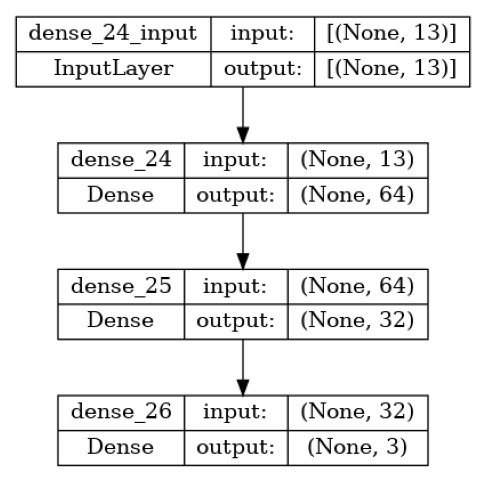

In [124]:
# Plot the ANN model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8, 6))
img = plt.imread('model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [107]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save its history
h = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
4/4 [==============================] - 0s 47ms/step - loss: 1.4192 - accuracy: 0.1102 - val_loss: 1.5231 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 1.2324 - accuracy: 0.2362 - val_loss: 1.3712 - val_accuracy: 0.2000
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0860 - accuracy: 0.3937 - val_loss: 1.2517 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9595 - accuracy: 0.5669 - val_loss: 1.1491 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8534 - accuracy: 0.6142 - val_loss: 1.0668 - val_accuracy: 0.4000
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7662 - accuracy: 0.6457 - val_loss: 0.9960 - val_accuracy: 0.4000
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.7008 - val_loss: 0.9304 - val_accuracy: 0.4667
Epoch 8/100
4/4 [========

In [108]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000
Test Accuracy: 1.0


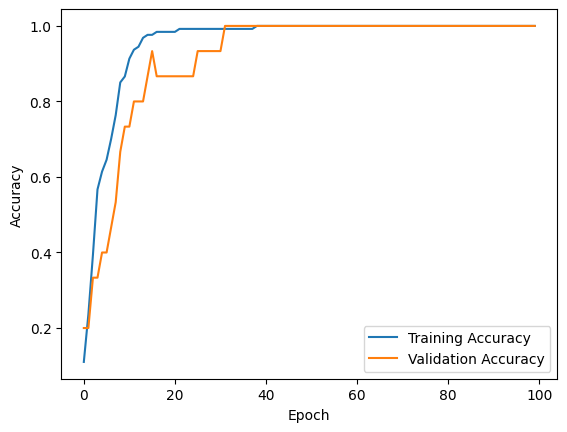

In [109]:
# Plot the model's training history
plt.plot(h.history['accuracy'], label='Training Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

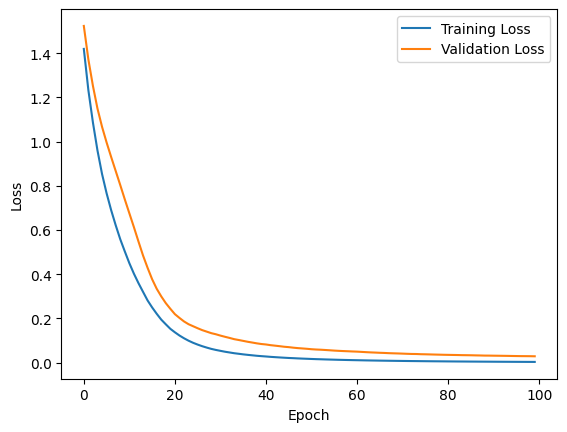

In [110]:
# Plot the model's training history
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [113]:
# !pip install seaborn

In [115]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
# Make predictions on the test set
y_pred_one_hot = model.predict(X_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)

2/2 [==============================] - 0s 3ms/step


In [118]:
# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [119]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

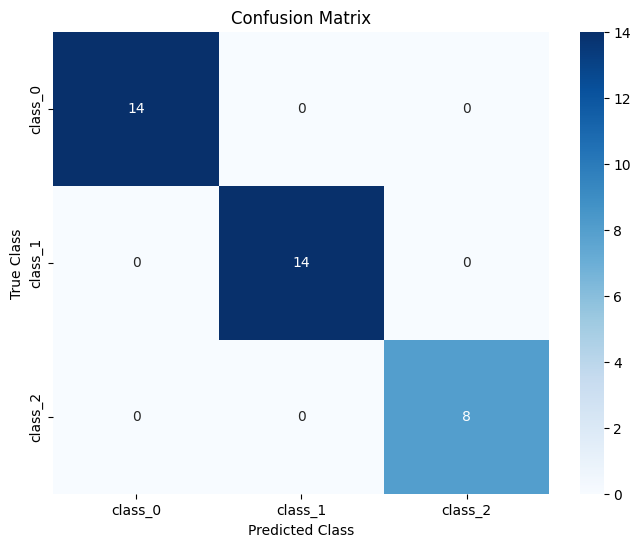

In [120]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

# What's more ???

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate the dataset
np.random.seed(42)
X = np.random.uniform(1, 10, size=(1000, 1))
y = np.log(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(1,), kernel_initializer = 'zeros', bias_initializer = 'zeros') )
model.add(Dense(3, activation='relu', kernel_initializer = 'zeros', bias_initializer = 'zeros') )
model.add(Dense(1, kernel_initializer = 'zeros', bias_initializer = 'zeros') )

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1)

Epoch 1/200
23/23 [==============================] - 1s 7ms/step - loss: 2.7130 - val_loss: 2.6428
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 2.6433 - val_loss: 2.5741
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 2.5749 - val_loss: 2.5072
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 2.5080 - val_loss: 2.4421
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 2.4430 - val_loss: 2.3781
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 2.3791 - val_loss: 2.3161
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 2.3168 - val_loss: 2.2555
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 2.2563 - val_loss: 2.1955
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 2.1963 - val_loss: 2.1380
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 2.1384 - val_loss: 2.0814
Epoch 11/

In [4]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

7/7 [==============================] - 0s 1ms/step
Mean Squared Error: 0.3875363423708618


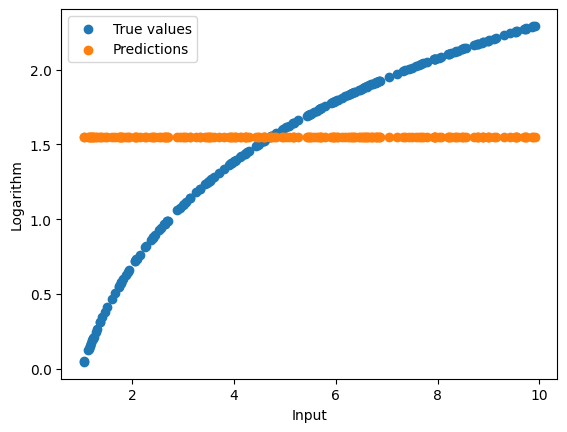

In [5]:
# Plot the true values and predictions
plt.scatter(X_test, y_test, label='True values')
plt.scatter(X_test, y_pred, label='Predictions')
plt.xlabel('Input')
plt.ylabel('Logarithm')
plt.legend()
plt.show()

In [7]:
# Extract weights and biases for each layer
for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    print(f"Layer {i+1}: {layer.name}")
    print(f"Weights:\n{weights}")
    print(f"Biases:\n{biases}\n")


Layer 1: dense
Weights:
[[0. 0. 0.]]
Biases:
[0. 0. 0.]

Layer 2: dense_1
Weights:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Biases:
[0. 0. 0.]

Layer 3: dense_2
Weights:
[[0.]
 [0.]
 [0.]]
Biases:
[1.5489515]

